<a href="https://colab.research.google.com/github/anshumaanshankar/GRIP/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name : Anshumaan Shankar
#Task 5 - Exploratory Data Analysis on Sports


#Importing the required libraries and the necessary datasets

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ANALYSIS PERFORMED ON THE MATCHES DATASET

In [94]:
match=pd.read_csv('matches.csv')
match.dropna()
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


##Gathering insights from how batting or fielding first has affected the outcomes of completed games. (ties / no result are not considered)

In [95]:
print('the number of times the team fielding first won: ') 
print(len(match[match['win_by_wickets']>0]))

print('the number of times the team batting first won: ') 
print(len(match[match['win_by_runs']>0]))

print('percentage of games won chasing')
won_chasing = len(match[match['win_by_wickets']>0]) / (len(match[match['win_by_wickets']>0]) + len(match[match['win_by_runs']>0]))
won_batting = 1-won_chasing
won_chasing * 100
won_batting * 100
print(round(won_chasing,2))

print('percentage of games won batting first')
round(won_batting,2)

the number of times the team fielding first won: 
406
the number of times the team batting first won: 
337
percentage of games won chasing
0.55
percentage of games won batting first


0.45

### We can see from this that about 55% of the matches logged in this dataset are won by the chasing team

##Team wise performance breakdown 
### percentage of match wins, toss wins, and occasions where the team won the toss and the match

In [96]:
team1=match.groupby('team1')
team2=match.groupby('team2')
toss_winner=match.groupby('toss_winner')
game_winner=match.groupby('winner')
toss_game_win=match[match['toss_winner']== match['winner']]['winner'].value_counts()

total_games=pd.DataFrame(data=team1.size() + team2.size(), columns=['total games played'])
total_games['matches won']=game_winner.size()
total_games['win percentage']=(total_games['matches won']/total_games['total games played'])*100
total_games['win percentage']=round(total_games['win percentage'],2)
total_games['tosses won']=toss_winner.size()
total_games.columns=['games played', 'games won', 'win percentage', 'tosses won']
total_games['toss and match won']=toss_game_win
total_games=total_games.sort_values('games won', ascending = False)
total_games=total_games[total_games['games played']>25]
total_games

,games played,games won,win percentage,tosses won,toss and match won
team1,,,,,
Mumbai Indians,187,109,58.29,98,56
Chennai Super Kings,164,100,60.98,89,57
Kolkata Knight Riders,178,92,51.69,92,53
Royal Challengers Bangalore,180,84,46.67,81,41
Kings XI Punjab,176,82,46.59,81,35
Rajasthan Royals,147,75,51.02,80,42
Delhi Daredevils,161,67,41.61,80,35
Sunrisers Hyderabad,108,58,53.70,46,23
Deccan Chargers,75,29,38.67,43,19


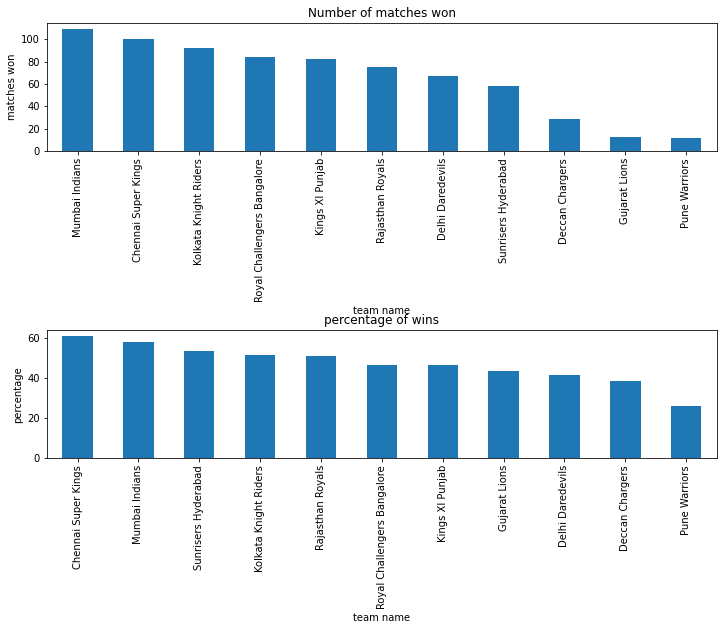

In [97]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
total_games['games won'].sort_values(ascending = False).plot.bar(xlabel ='team name', ylabel='matches won', title ='Number of matches won')

plt.subplot(3,1,3)
total_games['win percentage'].sort_values(ascending=False).plot.bar(xlabel = 'team name', ylabel='percentage', title='percentage of wins')
plt.show()

### we see that Mumbai Indians are the team with the most number of wins, but the best win percentage amongst the teams is that of CSK

##Judging teams based on their performances home and away

In [98]:
gameday=pd.DataFrame(data=team1.size(), columns =['home games'])
wins_at_home=match[match['team1']==match['winner']]
gameday['home wins']=wins_at_home['winner'].value_counts()
gameday['win % at home']=gameday['home wins']/gameday['home games']
gameday['win % at home']=round(gameday['win % at home'],2)
gameday['away games']=team2.size()
wins_away=match[match['team2']==match['winner']]
gameday['away wins']=wins_away['winner'].value_counts()
gameday['win % away']= gameday['away wins']/gameday['away games']
gameday['win % away']=round(gameday['win % away'],2)
gameday = gameday.sort_values(['home wins', 'win % at home','win % away'], ascending = False)
gameday

,home games,home wins,win % at home,away games,away wins,win % away
team1,,,,,,
Mumbai Indians,101,58.0,0.57,86,51,0.59
Chennai Super Kings,89,51.0,0.57,75,49,0.65
Kings XI Punjab,91,38.0,0.42,85,44,0.52
Royal Challengers Bangalore,85,35.0,0.41,95,49,0.52
Kolkata Knight Riders,83,34.0,0.41,95,58,0.61
Sunrisers Hyderabad,63,30.0,0.48,45,28,0.62
Rajasthan Royals,67,29.0,0.43,80,46,0.57
Delhi Daredevils,72,25.0,0.35,89,42,0.47
Deccan Chargers,43,18.0,0.42,32,11,0.34


<Figure size 1080x720 with 0 Axes>

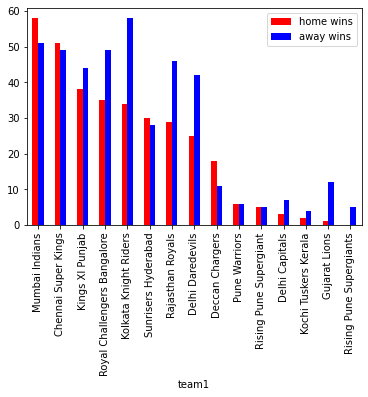

In [99]:
plt.figure(figsize=(15,10))
gameday[['home wins', 'away wins']].plot.bar(color = ['red','blue'])
plt.show()

###Mumbai Indians and CSK are the most formidable teams in their own home grounds, winning 57% of their games. CSK have the best win percentage in their away matches, winning 65% of them.

## Attempt to see which teams are better chasing, and which ones are better batting first.

In [100]:
won_chasing = match[match['win_by_wickets'] > 0]
won_chasing_teamwise=won_chasing.groupby('winner')
won_defending = match[match['win_by_runs'] > 0]
won_defending_teamwise=won_defending.groupby('winner')
wins_based=pd.DataFrame(data = won_chasing_teamwise.size(), columns=['won chasing'])
wins_based['won batting first'] = won_defending_teamwise.size()
wins_based.sort_values(['won batting first', 'won chasing'], ascending = False, inplace = True)
wins_based

,won chasing,won batting first
winner,,
Mumbai Indians,50,57
Chennai Super Kings,48,52
Kings XI Punjab,42,38
Kolkata Knight Riders,56,36
Royal Challengers Bangalore,48,35
Sunrisers Hyderabad,27,30
Rajasthan Royals,46,27
Delhi Daredevils,42,25
Deccan Chargers,11,18


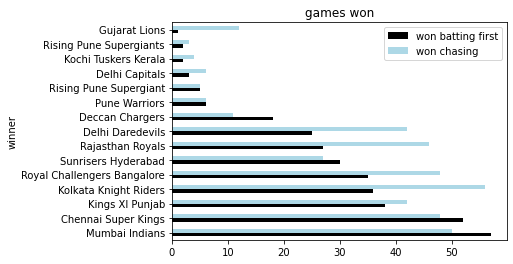

In [101]:
wins_based[['won batting first', 'won chasing']].sort_values(['won batting first', 'won chasing'], ascending = False).plot.barh(color=['black','lightblue'], title='games won')
plt.show()

### We can see that mumbai have won the most games while both setting a target, as well as chasing it down.

# ANALYSIS PERFORMED ON THE DELIVERIES DATASET

In [102]:
balls=pd.read_csv('deliveries.csv')
balls.dropna()
balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


## Determining which team scores and concedes the most runs, and the rates of doing so

In [103]:
run_data=pd.DataFrame()
run_data['runs scored']= balls.groupby('batting_team')['total_runs'].sum()
run_data['total balls faced']=balls.groupby('batting_team')['ball'].size()
run_data['batting strike rate']= balls.groupby('batting_team')['total_runs'].sum()/balls.groupby('batting_team')['ball'].size()*100
run_data['batting strike rate'] = round(run_data['batting strike rate'],2)

run_data['runs conceded'] = balls.groupby('bowling_team')['batsman_runs'].sum()
run_data['total balls bowled']=balls.groupby('bowling_team')['over'].size()
run_data['economy rate']=balls.groupby('bowling_team')['total_runs'].sum()/(balls.groupby('bowling_team')['over'].size()/6)
run_data['economy rate'] = round(run_data['economy rate'],2)
run_data['total extras given'] = balls.groupby('bowling_team')['extra_runs'].sum()

run_data=run_data.sort_values(['batting strike rate'], ascending = False)
run_data=run_data[run_data['runs scored'] > 10000]
run_data

,runs scored,total balls faced,batting strike rate,runs conceded,total balls bowled,economy rate,total extras given
batting_team,,,,,,,
Royal Challengers Bangalore,28126,20908,134.52,27011,21236,8.07,1558
Chennai Super Kings,26418,19762,133.68,23981,19556,7.73,1213
Kings XI Punjab,27893,20931,133.26,26873,20782,8.18,1453
Sunrisers Hyderabad,17059,12908,132.16,16027,12779,7.83,656
Mumbai Indians,29809,22619,131.79,27289,22517,7.70,1612
Kolkata Knight Riders,27419,20858,131.46,26003,20940,7.84,1372
Delhi Daredevils,24388,18786,129.82,23543,18725,7.95,1268
Rajasthan Royals,22431,17292,129.72,21412,17382,7.82,1245
Deccan Chargers,11463,9034,126.89,10959,9039,7.71,659


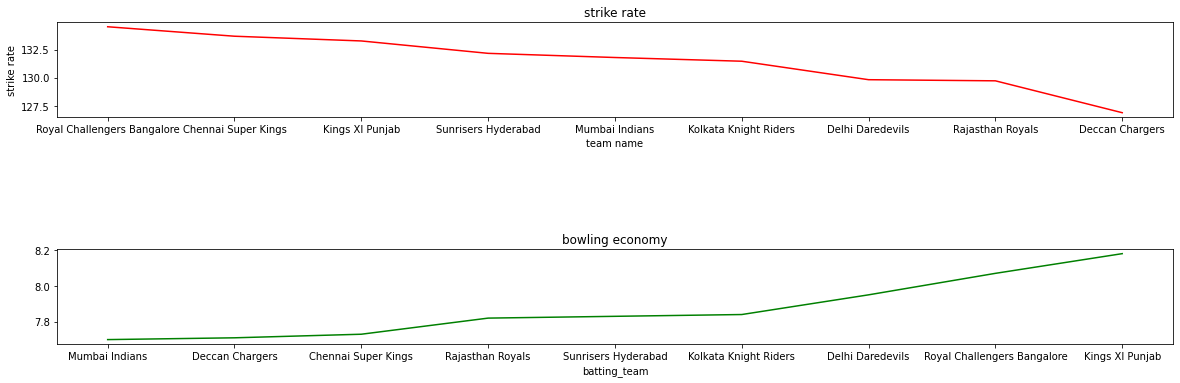

In [104]:
plt.figure(figsize=(20,8))

plt.subplot(4,1,1)
run_data['batting strike rate'].sort_values(ascending = False).plot(xlabel = 'team name', ylabel ='strike rate', title='strike rate',color='red')

plt.subplot(4,1,3)
run_data['economy rate'].sort_values(ascending = True).plot(title = 'bowling economy',color='green')
plt.show()

### The average strike rate is highest for the Royal Challengers Bangalore, and the best bowling economy is that of the Mumbai Indians


## Rate of taking wickets

In [105]:
balls=balls.fillna(value = 'None', axis=1)
wickets_data=balls[balls['player_dismissed']!='None']
teamwise=wickets_data.groupby('bowling_team')

wicket_metrics=pd.DataFrame(data=teamwise.size(),columns=['wickets taken'])
wicket_metrics['balls bowled']=balls.groupby('bowling_team')['over'].size()
wicket_metrics['wickets per match'] = wicket_metrics['wickets taken']/(team1.size() + team2.size())
wicket_metrics['wickets per match']=round(wicket_metrics['wickets per match'],2)
wicket_metrics=wicket_metrics[wicket_metrics['balls bowled'] > 5000]
wicket_metrics

,wickets taken,balls bowled,wickets per match
bowling_team,,,
Chennai Super Kings,1030,19556,6.28
Deccan Chargers,446,9039,5.95
Delhi Daredevils,912,18725,5.66
Kings XI Punjab,994,20782,5.65
Kolkata Knight Riders,1010,20940,5.67
Mumbai Indians,1138,22517,6.09
Pune Warriors,238,5457,5.17
Rajasthan Royals,856,17382,5.82
Royal Challengers Bangalore,1036,21236,5.76


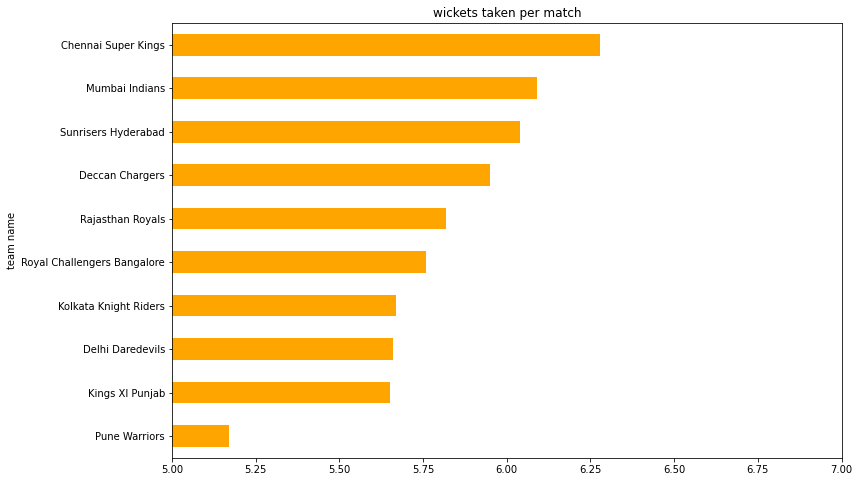

In [106]:
plt.figure(figsize=(12,8))
wicket_metrics['wickets per match'].sort_values(ascending = True).plot.barh(xlabel = 'team name', ylabel='wickets taken', xlim=(5,7), title='wickets taken per match', color='orange')
plt.show()

##PLAYER SPECIFIC DATA

In [107]:
runs_gathered=balls.groupby('batsman')['batsman_runs'].sum()
top_scorers=pd.DataFrame()
top_scorers['total scored']=runs_gathered
top_scorers['balls faced']=balls.groupby('batsman')['over'].size()
top_scorers['strike rate']=runs_gathered/balls.groupby('batsman')['over'].size() * 100
top_scorers['strike rate']=round(top_scorers['strike rate'],2)
top_scorers=top_scorers[top_scorers['total scored']>500]
top_scorers=top_scorers.sort_values('total scored', ascending = False)

innings1=balls[balls['inning']==1]
innings2=balls[balls['inning']==2]
Bat1=innings1.groupby('batsman')['batsman_runs'].sum()
Bat2=innings2.groupby('batsman')['batsman_runs'].sum()

top_scorers['first inning']=Bat1
top_scorers['second inning']=Bat2

top_scorers

,total scored,balls faced,strike rate,first inning,second inning
batsman,,,,,
V Kohli,5434,4211,129.04,2876,2553
SK Raina,5415,4044,133.90,3108,2299
RG Sharma,4914,3816,128.77,2837,2077
DA Warner,4741,3398,139.52,2571,2170
S Dhawan,4632,3776,122.67,2690,1942
...,...,...,...,...,...
CH Morris,520,339,153.39,222,298
S Gill,517,384,134.64,271,246
M Manhas,514,486,105.76,222,292


###Virat is the top run scorer overall, with 5434 runs. Raina outscores him in the first innings by about 230 runs, with the highest total of 3108 in the first innings. Virat't total of 2553 runs in the second innings is the highest amongst all batsmen

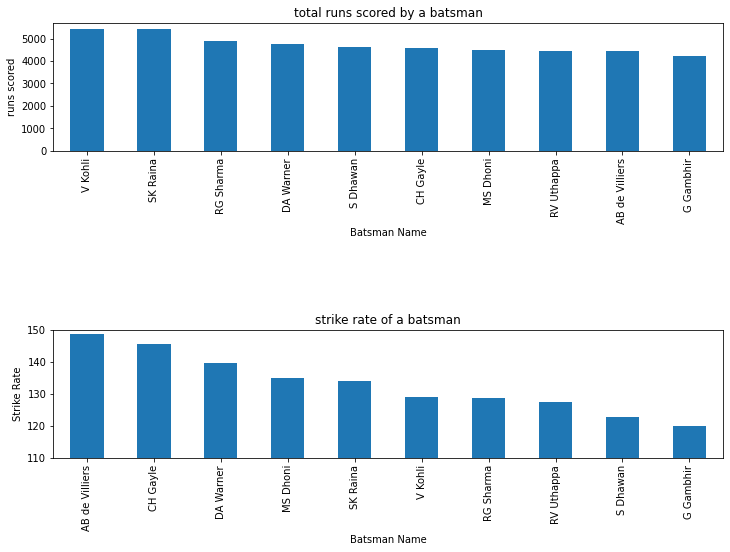

In [108]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
top_scorers['total scored'].head(10).sort_values(ascending = False).plot.bar(xlabel = 'Batsman Name', ylabel='runs scored', title='total runs scored by a batsman')

plt.subplot(3,1,3)
top_scorers['strike rate'].head(10).sort_values(ascending = False).plot.bar(xlabel = 'Batsman Name', ylabel='Strike Rate', ylim=(110,150), title='strike rate of a batsman')
plt.show()

###The fastest scorers of the runs are AB De Villiers, Gayle and Warner, all of them striking close to, or above 140

In [109]:
player_wise=wickets_data.groupby('bowler')
best_bowlers=pd.DataFrame()

best_bowlers['wickets taken']=player_wise.size()
best_bowlers['average']=balls.groupby('bowler')['total_runs'].sum()/best_bowlers['wickets taken']
best_bowlers['economy rate']=balls.groupby('bowler')['total_runs'].sum()/(balls.groupby('bowler')['over'].size()/6)
best_bowlers[['average','economy rate']]=round(best_bowlers[['average','economy rate']],2)

best_bowlers=best_bowlers.sort_values(['wickets taken', 'economy rate'], ascending = False)
best_bowlers['percentage of total wickets']=(best_bowlers['wickets taken']/best_bowlers['wickets taken'].sum()) * 100
best_bowlers=best_bowlers[best_bowlers['wickets taken'] > 15]
best_bowlers.head(20)

,wickets taken,average,economy rate,percentage of total wickets
bowler,,,,
SL Malinga,188,18.68,7.08,2.128141
DJ Bravo,168,22.22,8.26,1.901743
A Mishra,165,23.33,7.28,1.867784
Harbhajan Singh,161,25.16,7.04,1.822504
PP Chawla,156,26.62,7.89,1.765904
B Kumar,141,23.15,7.23,1.596106
R Ashwin,138,24.57,6.75,1.562146
SP Narine,137,21.45,6.78,1.550826
UT Yadav,136,26.76,8.38,1.539506


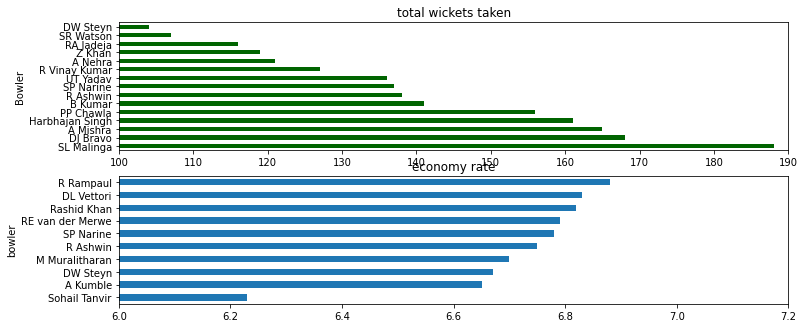

In [110]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
best_bowlers['wickets taken'].head(15).plot.barh(xlim=(100,190), ylabel='Wickets taken', xlabel='Bowler', title='total wickets taken', color='darkgreen')

plt.subplot(3,1,2)
best_bowlers['economy rate'].sort_values(ascending = True).head(10).plot.barh(xlim=(6,7.2), title = 'economy rate')

plt.show()

### We see that malinga is the most decorated bowler, with the highest number of wickets in the IPL. The best economy rate is held by Sohail Tanvir, which is just above 6.2 runs per over

### From the measured parameters, we can say that the best teams in the IPL overall, have been the mumbai indians and the chennai super kings. When it comes to individual performance, virat and raina are the most prolific batters, and malinga and Bravo are the most effective bowlers.